# **Prediksi Penyakit Jantung**

**Latar Belakang**

Cardiovascular desease (CVD) atau penyakit kardiovaskuler merupakan salah satu penyebab kematian nomor satu secara global. Diestimasikan telah merenggut nyawa sekitar 18 juta jiwa setiap tahunnya atau 31% dari seluruh penyebab kematian secara global. Empat dari lima kematian CVD diakibatkan oleh serangan jantung dan stroke, dan sepertiganya dialami secara prematur oleh sesorang dengan usia di bawah 70 tahun.

Kegagalan jantung merupakan salah salah penyebab umum dari penyakit kardiovaskuler. Sebagai seorang associate data scientist, Saya ditugaskan untuk melakukan prediksi terhadap kemungkinan terjadinya penyakit jantung. Diharapkan pemodelan yang dihasilkan dapat membantu kinerja dokter dalam mendeteksi pasien dengan penyakit jantung, sehingga dapat menolong lebih banyak orang yang berisiko tinggi terkena penyakit
kardiovaskuler.

## Install dan Import Module

In [ ]:
!pip install sweetviz
!pip install graphiz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 48.1 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement graphiz (from versions: none)
ERROR: No matching distribution found for graphiz


In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import time, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
plt.style.use('bmh'); sns.color_palette("tab20"); sns.set()
import sweetviz
import graphviz
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

## Load Data


In [ ]:
# Loading Data
import warnings; warnings.simplefilter('ignore')
import pandas as pd
file_ = '/content/data/heart.csv'
try: # Running Locally
    df = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/arubhasy/dataset/main/heart.csv
    df = pd.read_csv(file_)

N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.head()

mkdir: cannot create directory ‘data’: File exists
--2023-11-17 11:54:22--  https://raw.githubusercontent.com/arubhasy/dataset/main/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35902 (35K) [text/plain]
Saving to: ‘data/heart.csv’

heart.csv           100%[===================>]  35.06K  --.-KB/s    in 0.007s  

2023-11-17 11:54:22 (5.06 MB/s) - ‘data/heart.csv’ saved [35902/35902]

baris =  918 , Kolom (jumlah variabel) =  12


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Dataset ini berisi informasi medis yang berkaitan dengan penyakit jantung. Berikut adalah pemahaman rinci tentang fitur-fitur dalam dataset:

* Data Penyakit Jantung, dengan terdiri dari 918 baris dan 12 kolom
* Variabel Target: Apakah kemungkinan terjadinya penyakit yaitu
  **HeartDisease**: (1: Penyakit jantung, 0: Normal).

* Variabel Prediktor:
1. **Age (Umur)**: Usia pasien dalam tahun. Usia dapat mempengaruhi risiko penyakit jantung, dengan risiko biasanya meningkat seiring bertambahnya usia.
2. **Sex (Jenis Kelamin)**: Jenis kelamin pasien  (M: Male, F: Female). Penyakit jantung dapat mempengaruhi laki-laki dan perempuan secara berbeda.
3. **ChestPainType (Tipe Nyeri Dada)**: Jenis nyeri dada yang dialami pasien (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic). Nyeri dada adalah gejala umum dari penyakit jantung.
4. **RestingBP (Tekanan Darah Istirahat)**: Tekanan darah istirahat dalam mm Hg. Tekanan darah tinggi dapat meningkatkan risiko penyakit jantung.
5. **Cholesterol (Kolesterol Serum)**: Kadar kolesterol serum dalam mg/dl. Kolesterol tinggi dapat meningkatkan risiko penyakit jantung.
6. **FastingBS (Gula darah puasa)**: (1: Jika FastingBS > 120 mg/dl, 0: Sebaliknya). Diabetes dapat meningkatkan risiko penyakit jantung.
7. **RestingECG (Elektrokardiogram Istirahat)**: Denyut jantung maksimal istirahat (Normal: Normal, ST: memiliki abnormalitas gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV), LVH: menunjukkan hipertrofi ventrikel kiri yang mungkin atau pasti menurut kriteria Estes). Abnormalitas dalam EKG dapat menunjukkan penyakit jantung.
8. **MaxHR (Denyut Jantung Maksimum)**: Denyut jantung maksimum yang dicapai pasien (Nilai numerik antara 60 dan 202). Denyut jantung yang abnormal selama atau setelah olahraga dapat menunjukkan penyakit jantung.
9. **ExerciseAngina (Angina Selama Latihan)**: Angina adalah nyeri atau ketidaknyamanan yang terjadi ketika otot jantung tidak mendapatkan cukup oksigen. Informasi variabel "ExerciseAngina" tidak ada, sehingga diasumsikan bahwa variabel tersebut mengukur apakah pasien mengalami angina atau tidak (N: No, Y: Yes)
10. **Oldpeak (Depresi ST)**: Depresi ST yang diukur dalam mm. Depresi ST dapat menunjukkan penyakit jantung iskemik.
11. **ST_Slope (Kemiringan Segmen ST)**: Kemiringan puncak segmen ST selama latihan (Up: Naik, Flat: Datar, Down: Turun). Kemiringan ST dapat menunjukkan penyakit jantung iskemik.

Sebagai seorang data scientist, kita akan menganalisis hubungan antara variabel-variabel ini dan bagaimana mereka dapat digunakan untuk memprediksi penyakit jantung. Ini akan melibatkan eksplorasi data, pembersihan dan pemrosesan data, pemilihan model, pelatihan model, dan evaluasi model. Selain itu, kita juga akan mempertimbangkan faktor-faktor seperti ketidakseimbangan kelas dalam variabel target dan pentingnya interpretasi model dalam konteks medis.

## **Penelaahan Data (EDA)**

### Memuat Tipe data dan karakteristik data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


### Mengubah kolom tipe object menjadi kategori

In [ ]:
varObjects = df.select_dtypes(include = ['object'])
varObjects.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [ ]:
for col in varObjects.columns:
    df[col] = df[col].astype('category')

In [ ]:
df['HeartDisease'] = df['HeartDisease'].astype('category')
df['FastingBS'] = df['FastingBS'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             911 non-null    float64 
 1   Sex             908 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    category
dtypes: category(7), float64(2), int64(3)
memory usage: 43.2 KB


In [ ]:
# memisah data berdasarkan tipe data
df_kategori = df.select_dtypes(include = ['category'])
df_numerik = df.select_dtypes(include = ['float64', 'int64'])

print('varibel kategorik :', set(df_kategori.columns))
print('varibel numerik :', set(df_numerik.columns))

varibel kategorik : {'HeartDisease', 'RestingECG', 'ST_Slope', 'FastingBS', 'Sex', 'ChestPainType', 'ExerciseAngina'}
varibel numerik : {'MaxHR', 'Cholesterol', 'Oldpeak', 'Age', 'RestingBP'}


 - Berdasarkan info pada data, saya mengubah beberapa fitur bertipe "object" yang tidak sesuai, diubah menjadi tipe data "category". Serta mengubah variabel "FastingBS" dan "HeartDisease" menjadi category.
 - Setelah diperiksa dan diseleksi berdasarkan business understanding/domain knowledge tidak ada variabel/fitur yang tidak relevan/tidak informatif. Jadi, semua variabel prediktor dapat digunakan.

### Statistik Deskriptif

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,911.0,NaN,NaN,NaN,54.102086,12.988393,0.0,47.0,54.0,60.0,177.0
Sex,908,2,M,717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChestPainType,918,4,ASY,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RestingBP,918.0,NaN,NaN,NaN,132.396514,18.514154,0.0,120.0,130.0,140.0,200.0
Cholesterol,918.0,NaN,NaN,NaN,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,2.0,0.0,704.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RestingECG,918,3,Normal,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxHR,918.0,NaN,NaN,NaN,136.809368,25.460334,60.0,120.0,138.0,156.0,202.0
ExerciseAngina,918,2,N,547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oldpeak,918.0,NaN,NaN,NaN,0.887364,1.06657,-2.6,0.0,0.6,1.5,6.2



   - **Age (Umur):**
     - Rata-rata umur pasien adalah sekitar 54 tahun, dengan nilai minimum adalah 0 (yang mungkin menunjukkan data yang hilang atau kesalahan entri) dan nilai maksimum adalah 177 (yang tampaknya tidak mungkin dan mungkin juga merupakan kesalahan entri).
     - standar deviasi sekitar 13 tahun. Standar deviasi yang tinggi menunjukkan variasi yang signifikan dalam distribusi umur.

   - **RestingBP (Tekanan Darah Istirahat):**
     - Rata-rata tekanan darah istirahat adalah sekitar 132 mm Hg, dengan nilai minimum 0 (mungkin ada nilai yang tidak valid) dan maksimum 200 mm Hg.
     - Standar deviasi yang moderat menunjukkan variasi yang relatif stabil, standar deviasi sekitar 18.5.

   - **Cholesterol (Kolesterol Serum):**
     - Rata-rata kolesterol serum adalah sekitar 199 mg/dl, dengan nilai minimum 0 (mungkin ada nilai yang tidak valid) dan maksimum 603 mg/dl.
     - Standar deviasi yang tinggi menunjukkan variasi yang signifikan dalam distribusi kolesterol, standar deviasi sekitar 109.

   - **MaxHR (Denyut Jantung Maksimum):**
     - Rata-rata denyut jantung maksimum adalah sekitar 137 bpm, dengan nilai minimum 60 dan maksimum 202 bpm.
     - standar deviasi sekitar 25.5.

   - **Oldpeak (Depresi ST):**
     - Rata-rata depresi segmen ST adalah sekitar 0.89, dengan nilai minimum -2.6 dan maksimum 6.2.
     - Standar deviasi yang tinggi menunjukkan variasi yang signifikan dalam depresi ST, standar deviasi sekitar 1.07..

   - **HeartDisease (Penyakit Jantung):**
     - Rata-rata 55.3% dari pasien memiliki penyakit jantung (nilai 1), sementara 44.7% tidak memiliki penyakit jantung (nilai 0). Nilai minimum dan maksimum adalah 0 dan 1, masing-masing, yang menunjukkan bahwa ini adalah variabel biner.


In [ ]:
# Mengubah umur 0 menjadi Nan
df['Age'] = df['Age'].replace({0: np.nan})

# Mengimputasi nilai nol dalam kolesterol dengan rata-rata
df['Cholesterol'] = df['Cholesterol'].replace(0, df['Cholesterol'].mean())

# Mengimputasi nilai nol dalam restingBP dengan rata-rata
df['RestingBP'] = df['RestingBP'].replace(0, df['RestingBP'].mean())

### Check Noise di Variabel Kategorik


In [ ]:
catVar = df.select_dtypes(include = ['category'])

for col in catVar.columns:
    print(col,': ', set(df[col].unique()))

Sex :  {'M', nan, 'F'}
ChestPainType :  {'ASY', 'NAP', 'TA', 'ATA'}
FastingBS :  {0, 1}
RestingECG :  {'LVH', 'ST', 'Normal'}
ExerciseAngina :  {'N', 'Y'}
ST_Slope :  {'Up', 'Down', 'Flat'}
HeartDisease :  {0, 1}


Tidak terdapat noise pada variabel kategorik, tetapi untuk variabel Sex terdapat missing value "nan". Sehingga tidak ada penanganan untuk noise pada kasus tersebut.

### Check Noise pada Variabel Numerik


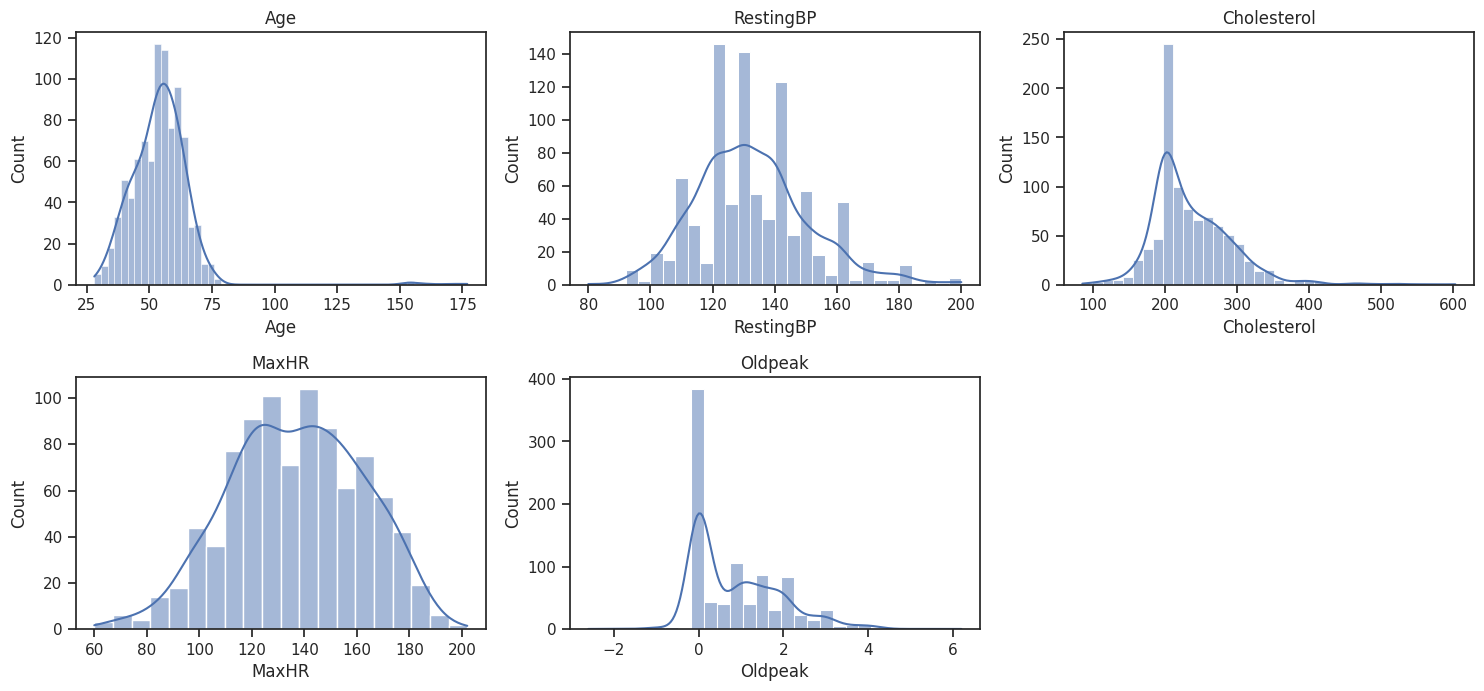

In [ ]:
plt.figure(figsize=(15, 10))

for col in df_numerik.columns:
  plt.subplot(3, 3, df_numerik.columns.get_loc(col) + 1)
  sns.histplot(data=df, x=col, kde=True)
  plt.title(col)

plt.tight_layout()
plt.show()

- Age: Grafik distribusi cenderung skew kanan dan terdapat nilai pencilan yaitu mengarah pada umur di atas 100 tahun. Tetapi hal tersebut diasumsikan bahwa manusia tidak ada yang hidup hingga umur 100 tahun, sehingga hal tersebut noise dan perlu dihilangkan.
- Oldpeak: terdapat noise yaitu adanya nilai minus dan outlier yang jauh dari rata-rata.

### Penanganan Noise pada Variabel Numerik




In [ ]:
df["Age"].unique()

array([ nan,  49.,  37.,  48.,  54.,  39.,  45.,  58.,  42.,  38.,  43.,
        60.,  36.,  44.,  40.,  53.,  52.,  51.,  56.,  41.,  32.,  65.,
        35.,  59.,  50.,  47.,  31.,  46.,  57., 155.,  55.,  63.,  66.,
        34.,  33.,  61.,  29.,  62.,  28.,  30.,  74.,  68.,  72.,  64.,
        69.,  67.,  73.,  70., 161., 177.,  75.,  76.,  71., 153., 170.,
       154.,  77.])

Berdasarkan nilai di atas, terdapat nilai pencilan yaitu pasien dengan usia 153,
154, 155, 161, 170 dan 177. Sehingga untuk umur yang lebih dari 100 diubah menjadi nan


In [ ]:
# mengubah umur yang lebih dari 100 menjadi Nan
df['Age'] = df['Age'].apply(lambda x: np.nan if x > 100 else x)

In [ ]:
df['Age'].unique()

array([nan, 49., 37., 48., 54., 39., 45., 58., 42., 38., 43., 60., 36.,
       44., 40., 53., 52., 51., 56., 41., 32., 65., 35., 59., 50., 47.,
       31., 46., 57., 55., 63., 66., 34., 33., 61., 29., 62., 28., 30.,
       74., 68., 72., 64., 69., 67., 73., 70., 75., 76., 71., 77.])

### Cek Duplikasi


In [ ]:
# mengecek duplikasi
print(df.shape)
print("jumlah data yang duplikat", df.duplicated().sum())
df[df.duplicated() == True].head()

(918, 12)
jumlah data yang duplikat 0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


Pada data ini tidak terdapat data duplikasi, sehingga tidak perlu melakukan penanganan duplikasi.

### Memeriksa Outlier

In [ ]:
# Visual Python: Visualization > Seaborn
def vp_seaborn_show_values(axs, precision=1, space=0.01):
    pstr = '{:.' + str(precision) + 'f}'

    def _single(ax):
        # check orient
        orient = 'v'
        if len(ax.patches) == 1:
            # check if 0
            if ax.patches[0].get_x() == 0:
                orient = 'h'
        else:
            # compare 0, 1 patches
            p0 = ax.patches[0]
            p1 = ax.patches[1]
            if p0.get_x() == p1.get_x():
                orient = 'h'

        if orient == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*space)
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_height())
                    ax.text(_x, _y, value, ha='center')
        elif orient == 'h':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + (space - 0.01)
                _y = p.get_y() + p.get_height() / 2
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_width())
                    ax.text(_x, _y, value, ha='left')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

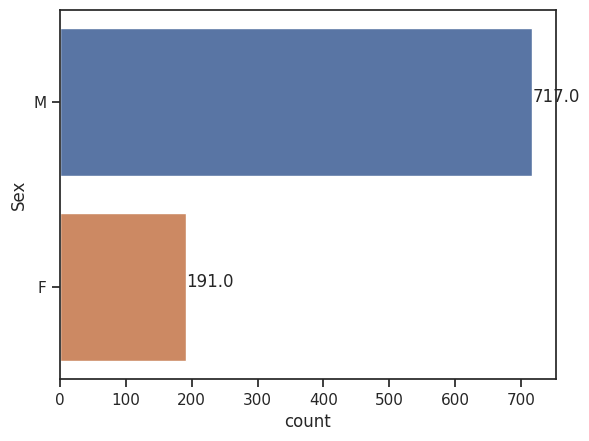

In [ ]:
# Visual Python: Visualization > Seaborn
# cek outlier pada data variabe category menggunakan barplot
ax = sns.countplot(data=df, y='Sex', order=df['Sex'].value_counts(ascending=False).index)
vp_seaborn_show_values(ax)
plt.show()

Tidak terdapat outlier pada variabel Sex

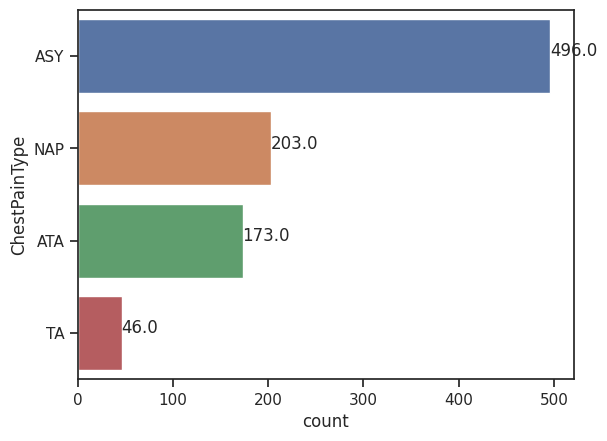

In [ ]:
# Visual Python: Visualization > Seaborn
bx = sns.countplot(data=df, y='ChestPainType', order=df['ChestPainType'].value_counts(ascending=False).index)
vp_seaborn_show_values(bx)
plt.show()

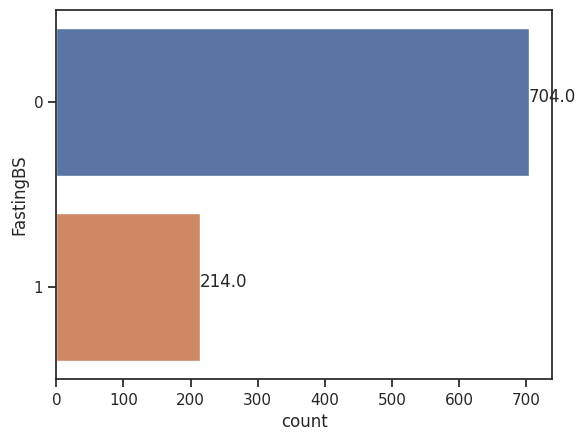

In [ ]:
# Visual Python: Visualization > Seaborn
cx = sns.countplot(data=df, y='FastingBS', order=df['FastingBS'].value_counts(ascending=False).index)
vp_seaborn_show_values(cx)
plt.show()

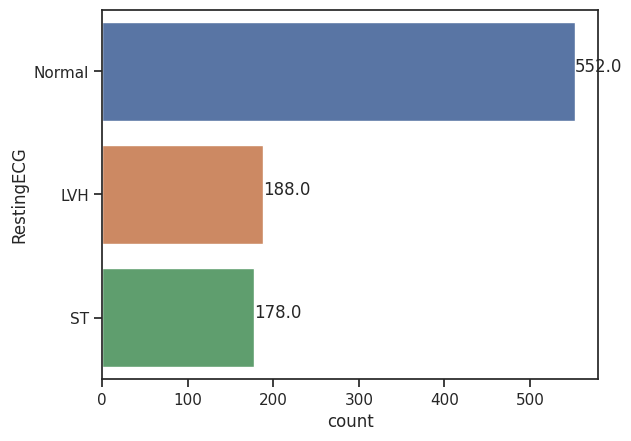

In [ ]:
# Visual Python: Visualization > Seaborn
dx = sns.countplot(data=df, y='RestingECG', order=df['RestingECG'].value_counts(ascending=False).index)
vp_seaborn_show_values(dx)
plt.show()

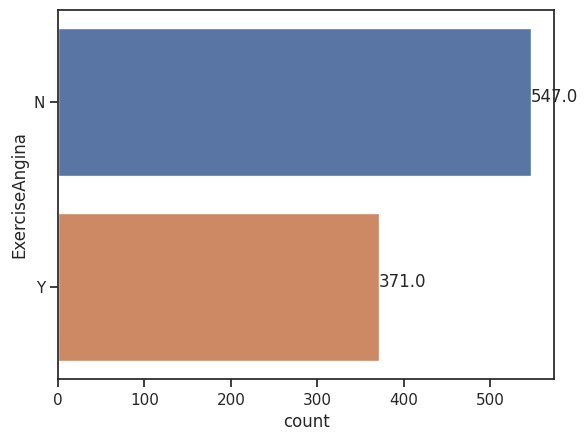

In [ ]:
# Visual Python: Visualization > Seaborn
ex = sns.countplot(data=df, y='ExerciseAngina', order=df['ExerciseAngina'].value_counts(ascending=False).index)
vp_seaborn_show_values(ex)
plt.show()

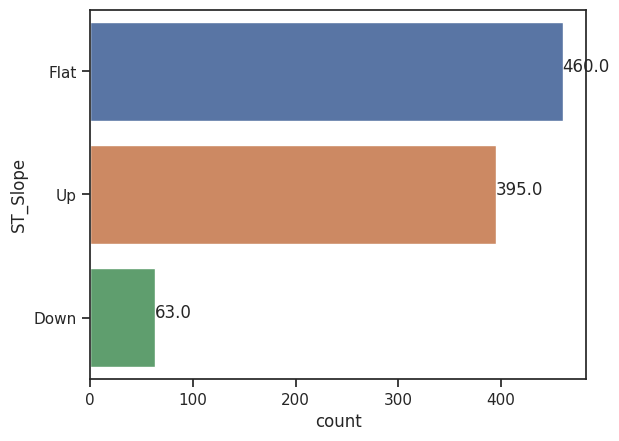

In [ ]:
# Visual Python: Visualization > Seaborn
fx = sns.countplot(data=df, y='ST_Slope', order=df['ST_Slope'].value_counts(ascending=False).index)
vp_seaborn_show_values(fx)
plt.show()

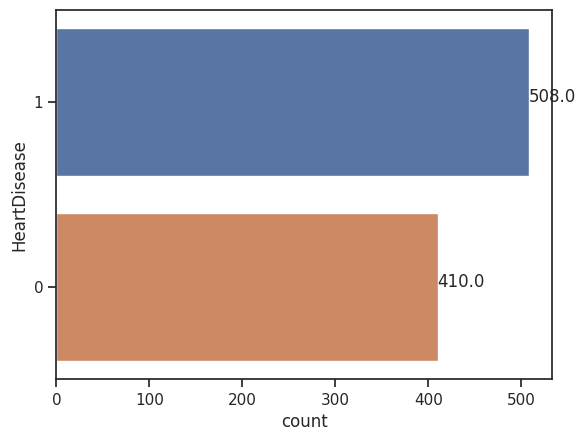

In [ ]:
# Visual Python: Visualization > Seaborn
ex = sns.countplot(data=df, y='HeartDisease', order=df['HeartDisease'].value_counts(ascending=False).index)
vp_seaborn_show_values(ex)
plt.show()

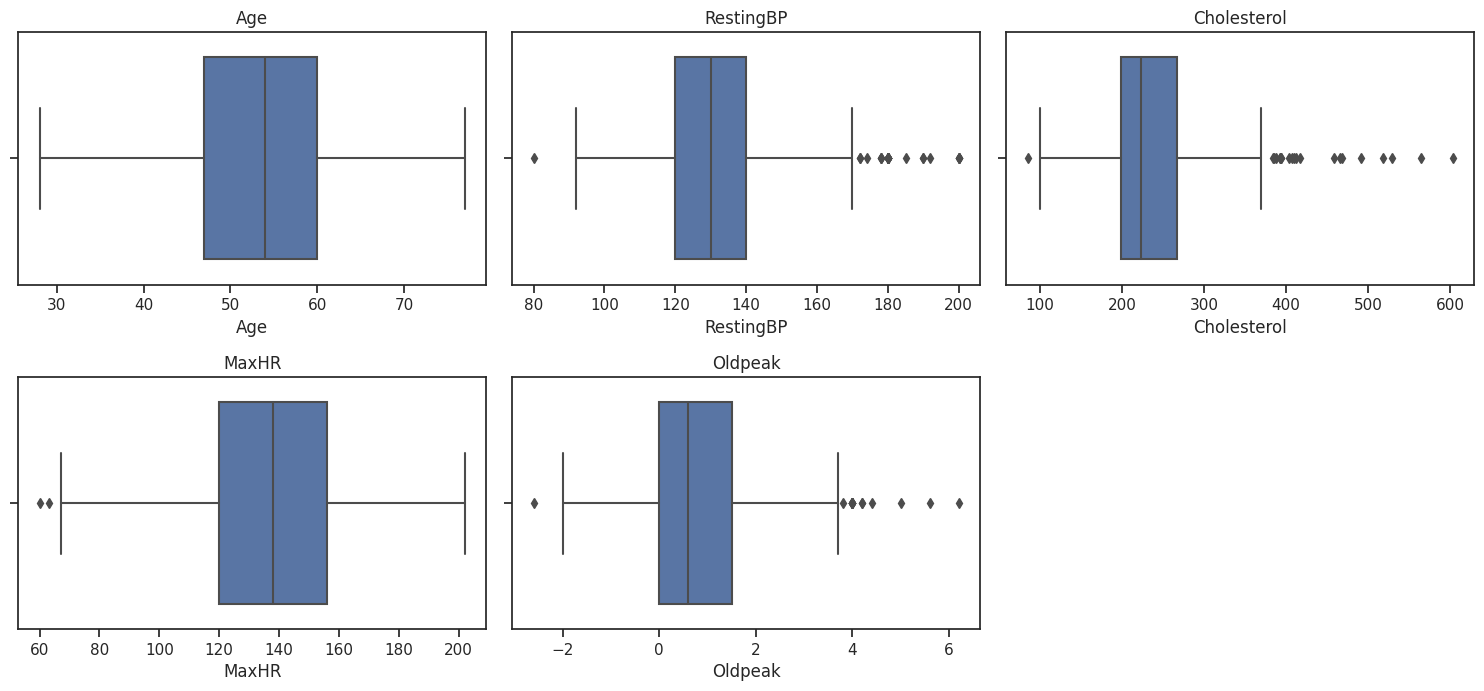

In [ ]:
# cek outlier pada data variabel numerik menggunakan boxplot
plt.figure(figsize=(15, 10))

for col in df_numerik.columns:
  plt.subplot(3, 3, df_numerik.columns.get_loc(col) + 1)
  sns.boxplot(data=df, x=col)
  plt.title(col)

plt.tight_layout()
plt.show()

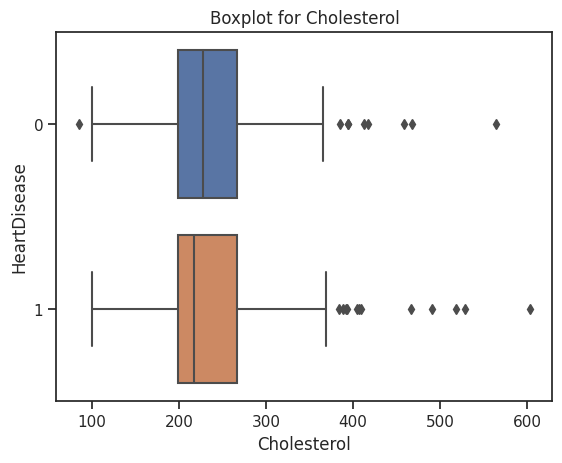

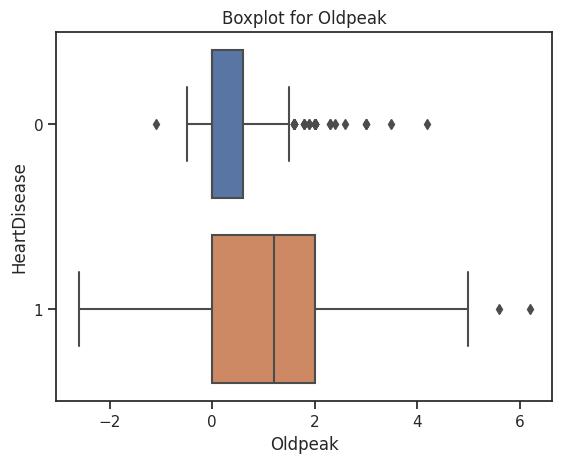

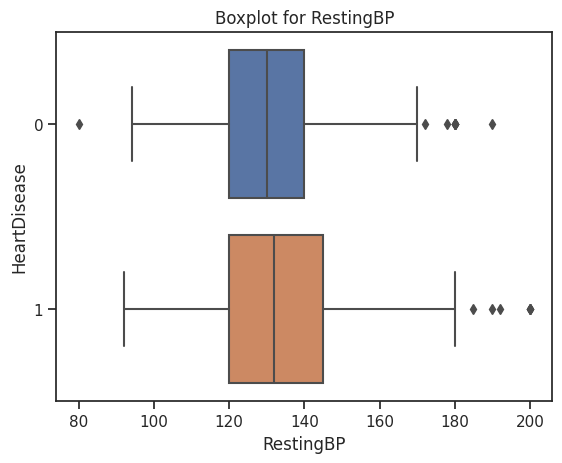

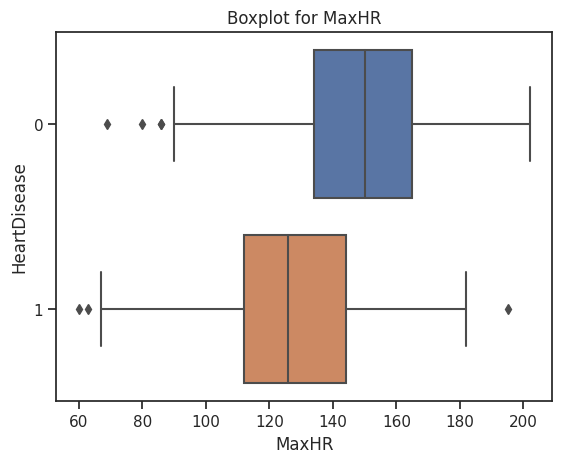

In [ ]:
# Menampilkan hubungan antar variabel dengan "HeartDisease" melalui boxplot
columns_to_plot = ["Cholesterol", "Oldpeak", "RestingBP", "MaxHR"]

for col in columns_to_plot:
    sns.boxplot(x=col, y="HeartDisease", data=df)
    plt.title(f'Boxplot for {col}')
    plt.show()

Q1=198.7995642701525, Q3=267.0, IQR=68.2004357298475


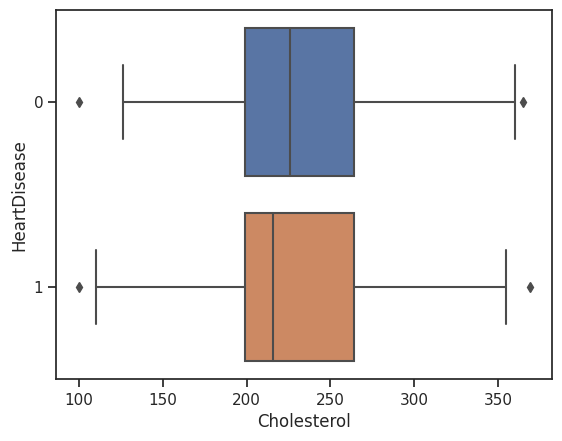

Q1=0.0, Q3=1.5, IQR=1.5


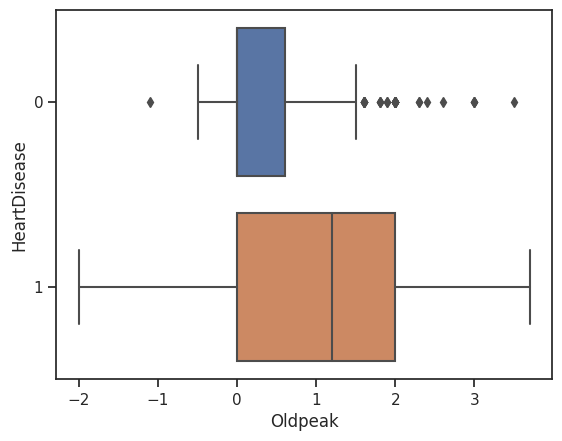

Q1=120.0, Q3=140.0, IQR=20.0


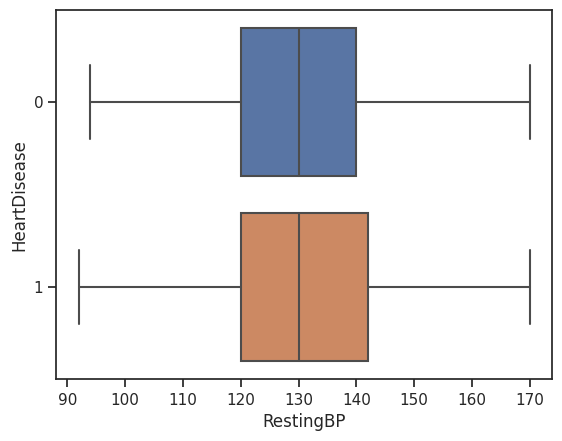

Q1=120.0, Q3=156.0, IQR=36.0


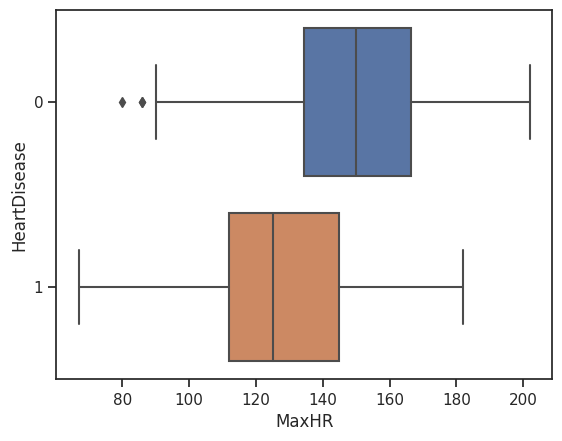

In [ ]:
# melakukan filter outlier

for col in columns_to_plot:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

  df.drop(df[(df[col] < Q1-1.5*IQR) | (df[col] > Q3+1.5*IQR)].index, inplace=True)
  p = sns.boxplot(x=col, y="HeartDisease", data=df)
  plt.show()

In [ ]:
print(len(df[df['Oldpeak']<0]))
print(len(df[df['Oldpeak']<0])/len(df))
df[df['Oldpeak']<0]

12
0.014018691588785047


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63.0,M,ASY,100.0,198.799564,1,Normal,109,N,-0.9,Flat,1
325,42.0,M,ASY,105.0,198.799564,1,Normal,128,Y,-1.5,Down,1
326,45.0,M,NAP,110.0,198.799564,0,Normal,138,N,-0.1,Up,0
331,56.0,M,ASY,115.0,198.799564,1,ST,82,N,-1.0,Up,1
332,38.0,M,NAP,100.0,198.799564,0,Normal,179,N,-1.1,Up,0
334,51.0,M,ASY,130.0,198.799564,1,Normal,170,N,-0.7,Up,1
335,62.0,M,TA,120.0,198.799564,1,LVH,134,N,-0.8,Flat,1
352,56.0,M,ASY,120.0,198.799564,0,ST,100,Y,-1.0,Down,1
407,62.0,M,ASY,115.0,198.799564,1,Normal,72,Y,-0.5,Flat,1
413,56.0,M,NAP,125.0,198.799564,1,Normal,98,N,-2.0,Flat,1


terdapat 1.5% pada variabel oldpeak yang bernilai minus. sehingga terdapat outlier.

In [ ]:
df.drop(df[df['Oldpeak']<0].index, inplace=True)
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


### Cek Missing Value


In [ ]:
# General Look at the Missing Values
print(df.isnull().sum())
print(df.shape)

Age               13
Sex               10
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64
(844, 12)


In [ ]:
# cek persentase missing tiap variabel
(df.isnull().sum()/len(df)*100).to_frame('persentase missing')

,persentase missing
Age,1.540284
Sex,1.184834
ChestPainType,0.000000
RestingBP,0.000000
Cholesterol,0.000000
FastingBS,0.000000
RestingECG,0.000000
MaxHR,0.000000
ExerciseAngina,0.000000
Oldpeak,0.000000


Pada kasus ini, missing value hanya ada pada variabel Age sebesar 1.5% dan Sex 1.1% sehingga missing value didrop.

In [ ]:
X = df.dropna()
print(df.shape, X.shape)
X.head()

(844, 12) (822, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49.0,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
5,39.0,M,NAP,120.0,339.0,0,Normal,170,N,0.0,Up,0


In [ ]:
print(X.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


### Relasi Data

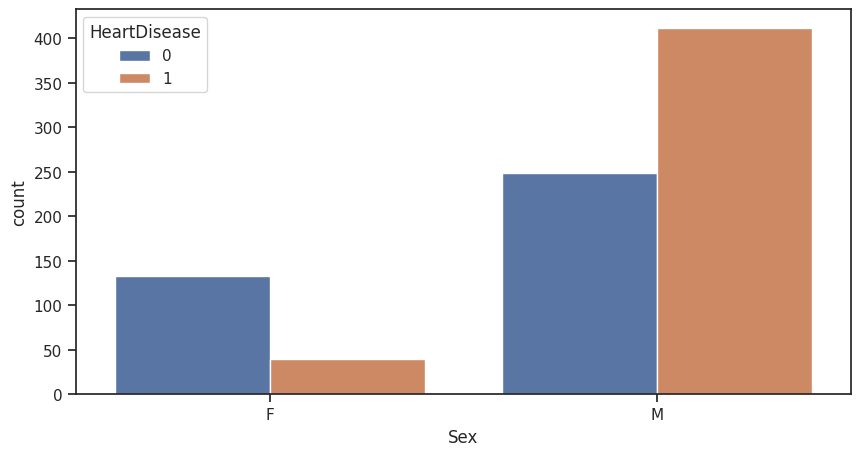

In [ ]:
# Visual Python: Visualization > Seaborn
plt.figure(figsize=(10,5))

sns.countplot(data=df, x='Sex', hue='HeartDisease')
plt.show()

Pasien Laki-laki cenderung banyak terkena penyakit jantung.

In [ ]:
# melihat korelasi diantara variabel prediktor
df.corr()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
Age,1.000000,0.273567,0.007269,-0.400762,0.268694
RestingBP,0.273567,1.000000,0.062156,-0.113665,0.151195
Cholesterol,0.007269,0.062156,1.000000,0.094258,0.032956
MaxHR,-0.400762,-0.113665,0.094258,1.000000,-0.207767
Oldpeak,0.268694,0.151195,0.032956,-0.207767,1.000000


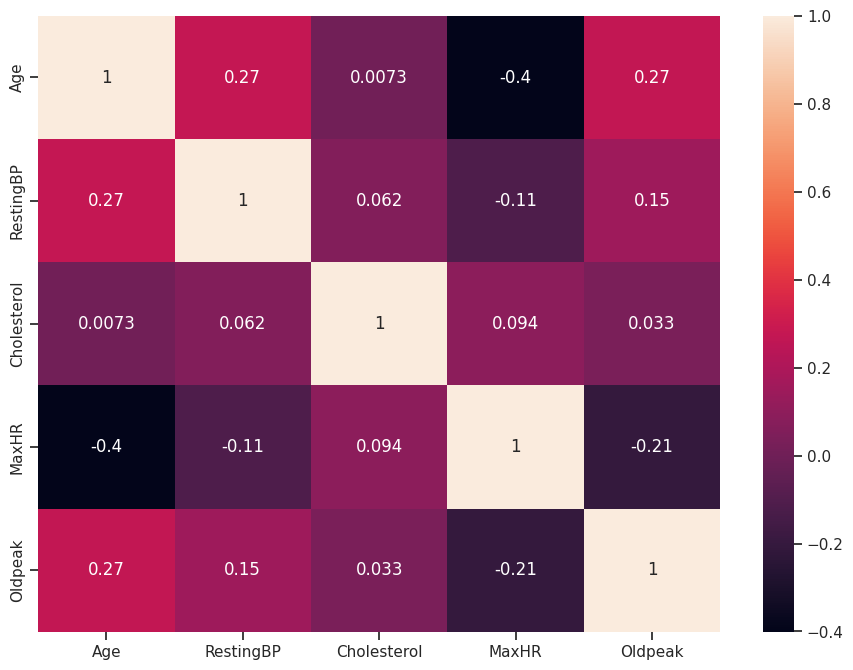

In [ ]:
# matriks korelasi
plt.figure(figsize=(11,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

1. Age dan Variabel Lainnya:

- **RestingBP (0.273567)**: Terdapat korelasi positif yang lemah antara usia (Age) dan tekanan darah istirahat (RestingBP). Ini menunjukkan bahwa seiring bertambahnya usia, tekanan darah istirahat cenderung meningkat sedikit.
- **MaxHR (-0.400762)**: Terdapat korelasi negatif yang cukup kuat antara usia dan denyut jantung maksimum (MaxHR). Hal ini menunjukkan bahwa seiring bertambahnya usia, kemungkinan denyut jantung maksimum yang dicapai selama latihan cenderung menurun.

2. RestingBP dan Variabel Lainnya:
- **Age (0.273567)**: Korelasi positif lemah dengan usia menunjukkan bahwa tekanan darah istirahat cenderung sedikit meningkat seiring bertambahnya usia.
- **MaxHR (-0.113665)**: Korelasi negatif lemah dengan denyut jantung maksimum menunjukkan bahwa tekanan darah istirahat cenderung sedikit menurun saat denyut jantung maksimum meningkat.

3. Cholesterol dan Variabel Lainnya:
Tidak ada korelasi yang signifikan: Korelasi antara kolesterol dan variabel lainnya rendah, menunjukkan bahwa kolesterol tidak memiliki korelasi yang kuat dengan usia, tekanan darah istirahat, denyut jantung maksimum, atau depresi segmen ST.

4. MaxHR dan Variabel Lainnya:
- **Age (-0.400762)**: Korelasi negatif yang cukup kuat dengan usia menunjukkan bahwa denyut jantung maksimum cenderung menurun seiring bertambahnya usia.
- **Oldpeak (-0.207767)**: Korelasi negatif yang lemah dengan depresi segmen ST menunjukkan bahwa denyut jantung maksimum yang lebih tinggi cenderung terkait dengan depresi segmen ST yang lebih rendah selama latihan.

5. Oldpeak dan Variabel Lainnya:
- **Age (0.268694)**: Korelasi positif lemah dengan usia menunjukkan bahwa depresi segmen ST cenderung meningkat seiring bertambahnya usia.
- RestingBP (0.151195)**: Korelasi positif lemah dengan tekanan darah istirahat menunjukkan bahwa depresi segmen ST cenderung meningkat sedikit dengan peningkatan tekanan darah istirahat.
- **MaxHR (-0.207767)**: Korelasi negatif lemah dengan denyut jantung maksimum menunjukkan bahwa depresi segmen ST yang lebih rendah selama latihan cenderung terkait dengan denyut jantung maksimum yang lebih tinggi.

## Report Kualitas Data

In [ ]:
# Visual Python: Logic > code
import sweetviz

                                             |          | [  0%]   00:00 -> (? left)


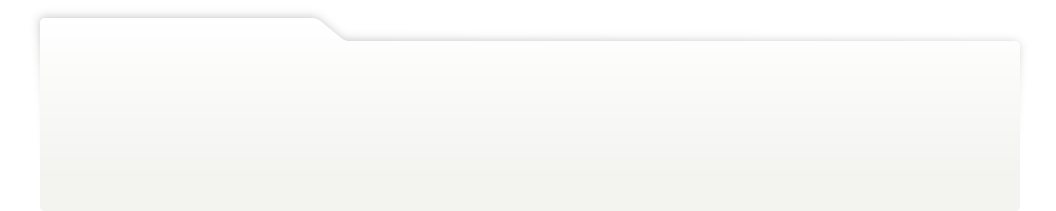
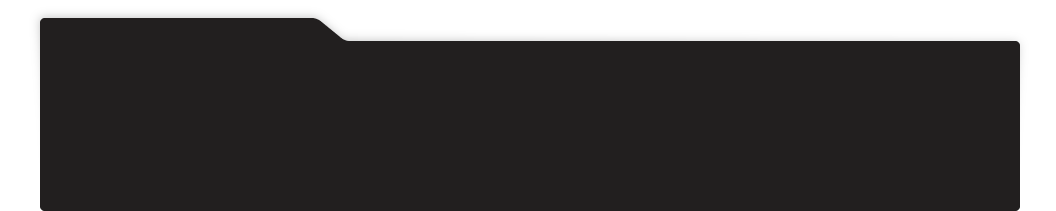
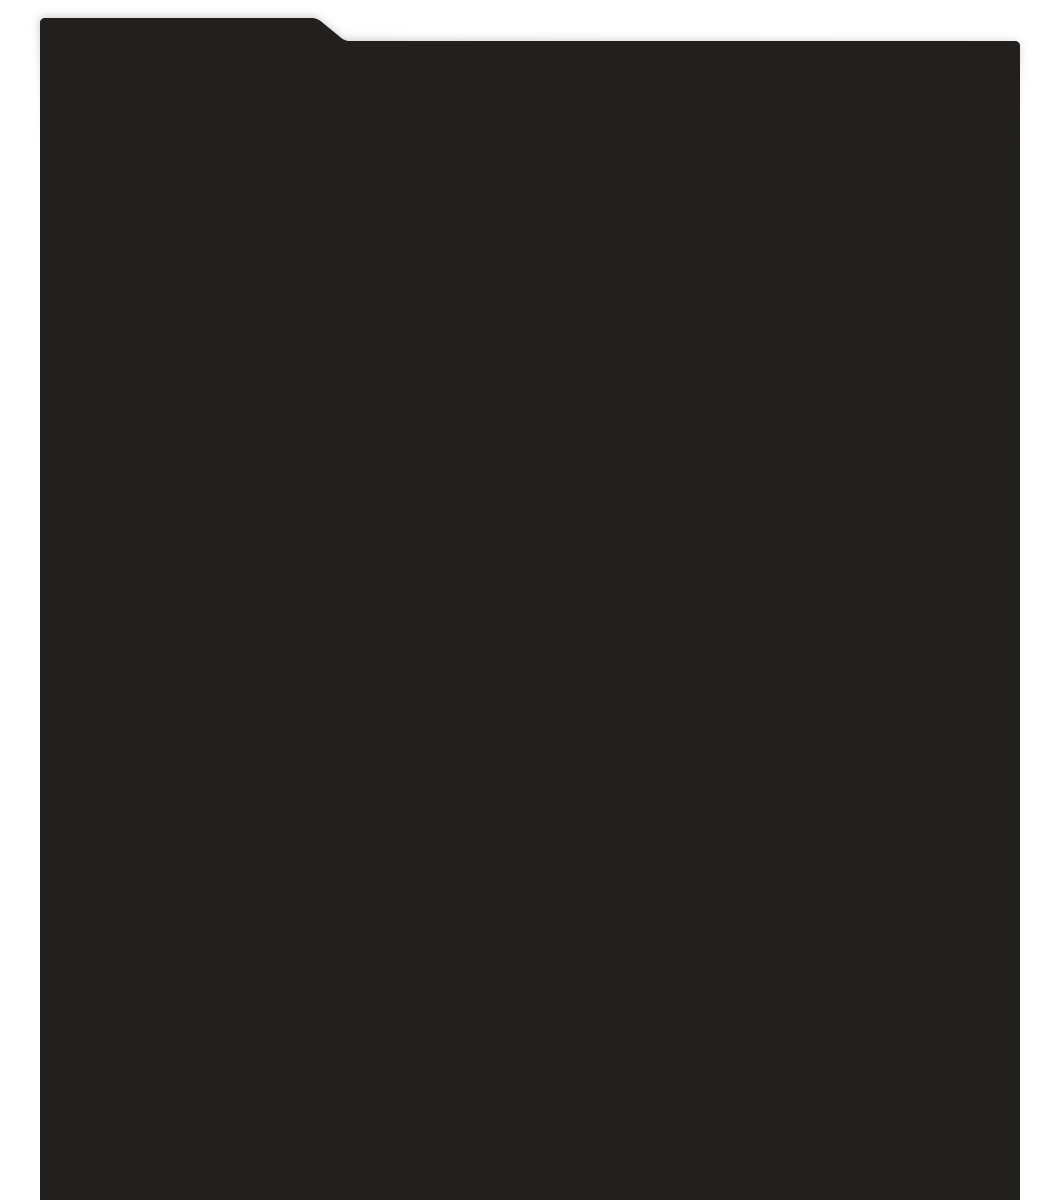
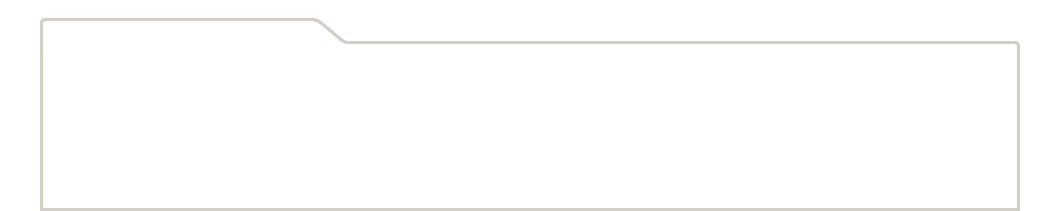
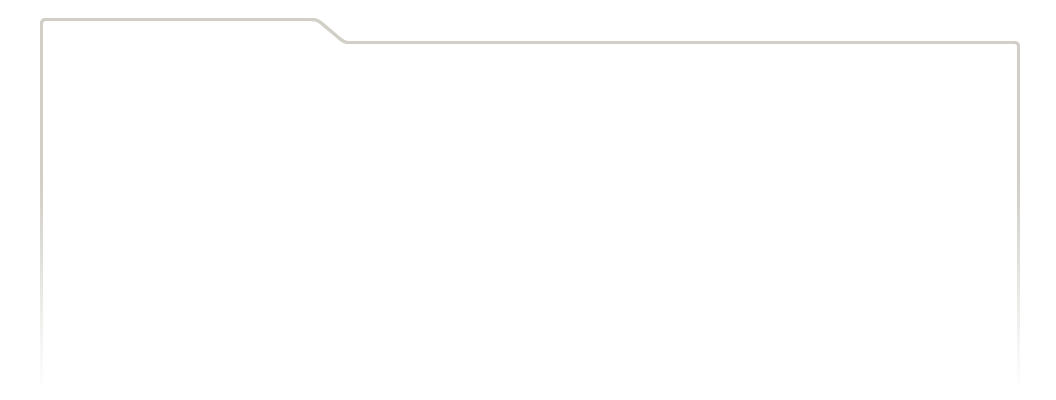
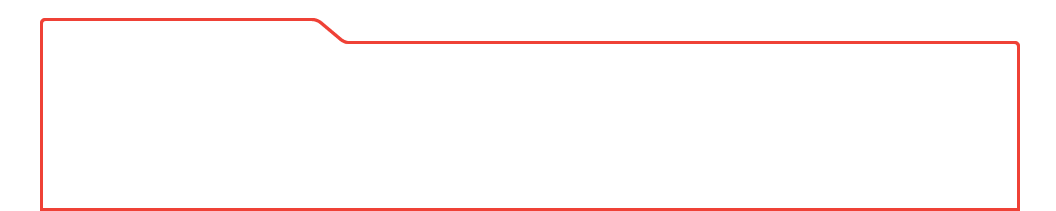
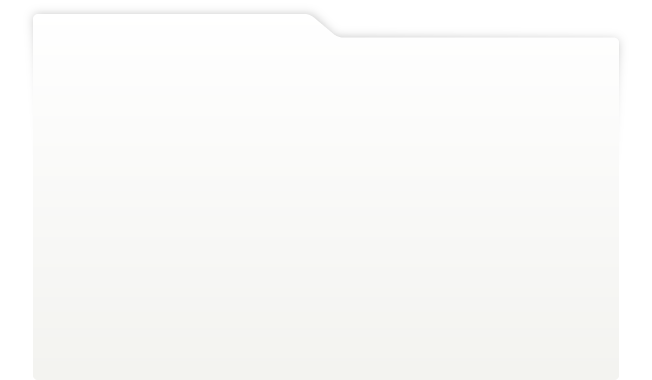
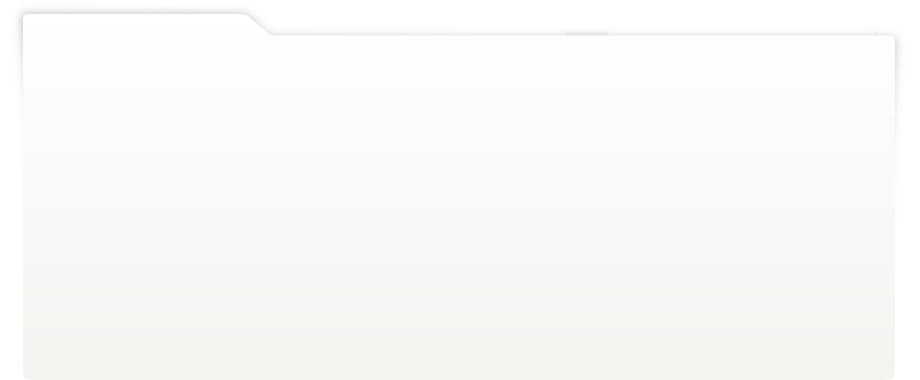
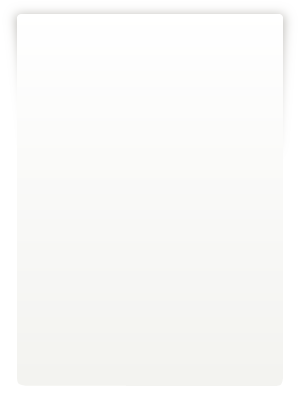
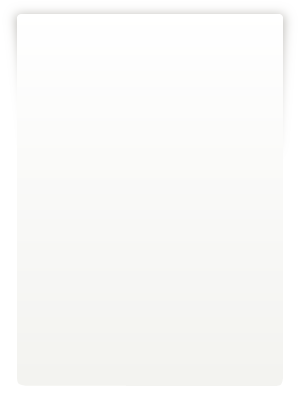
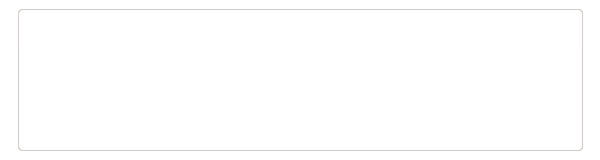
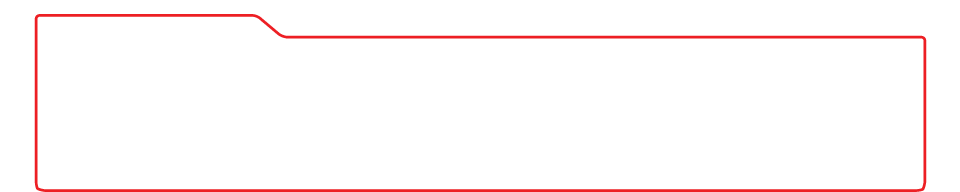
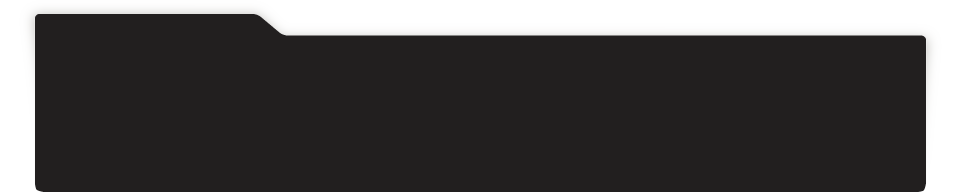
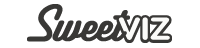
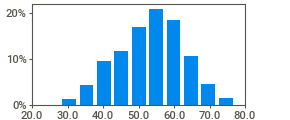
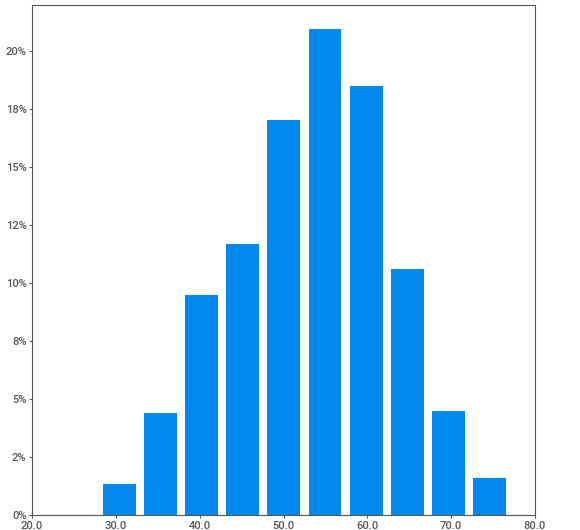
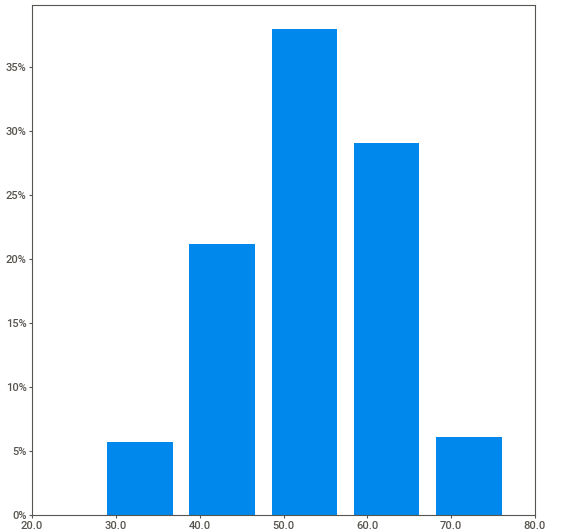
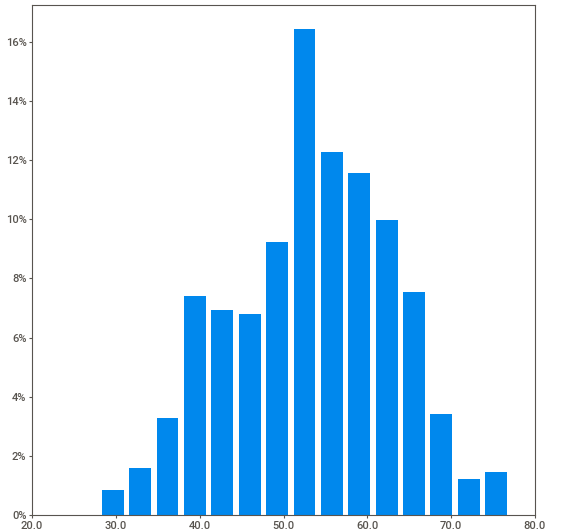
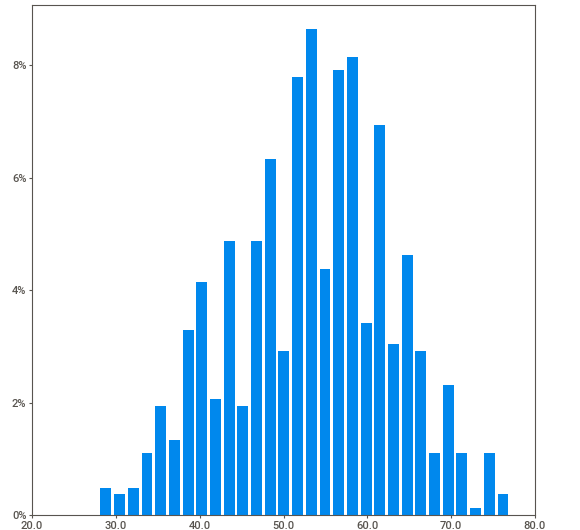
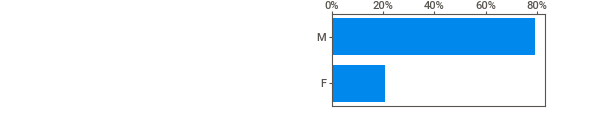
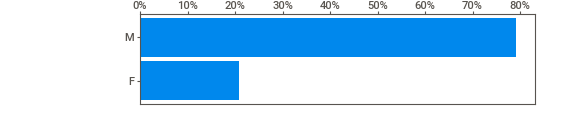
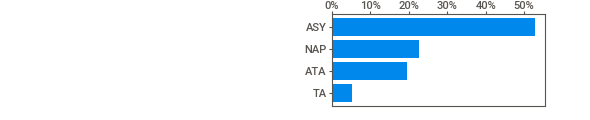
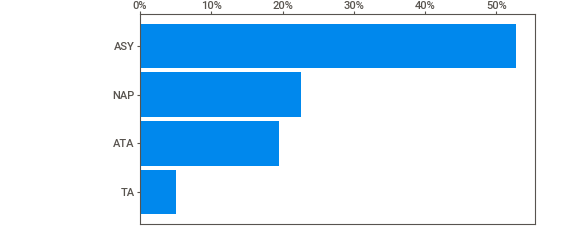
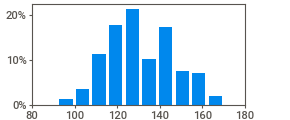
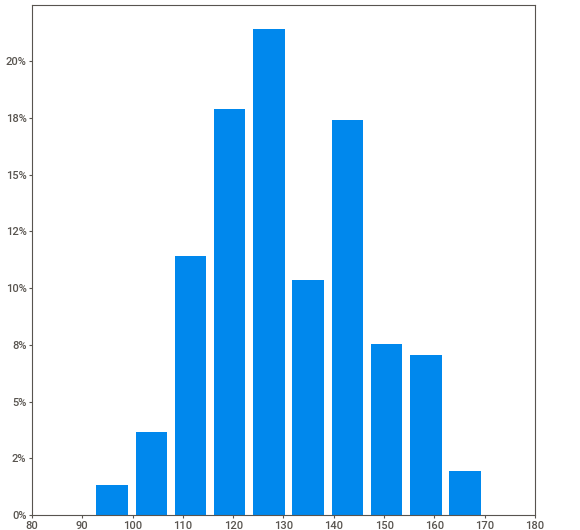
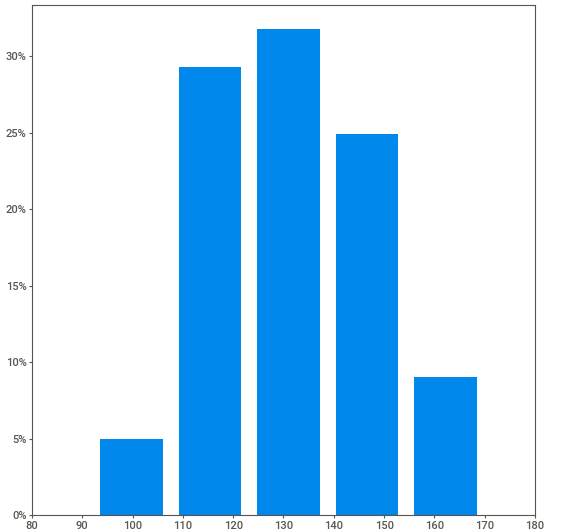
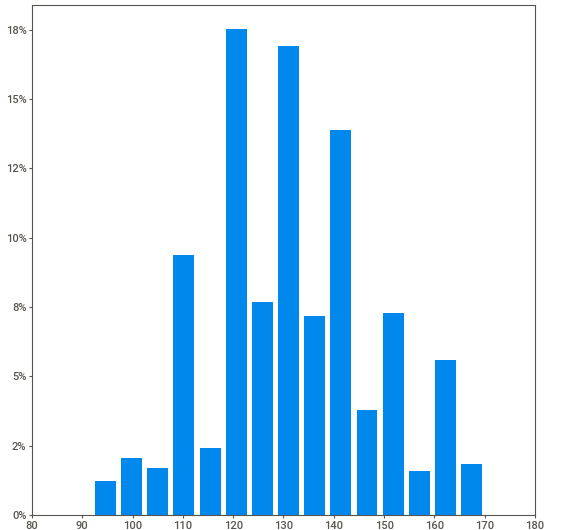
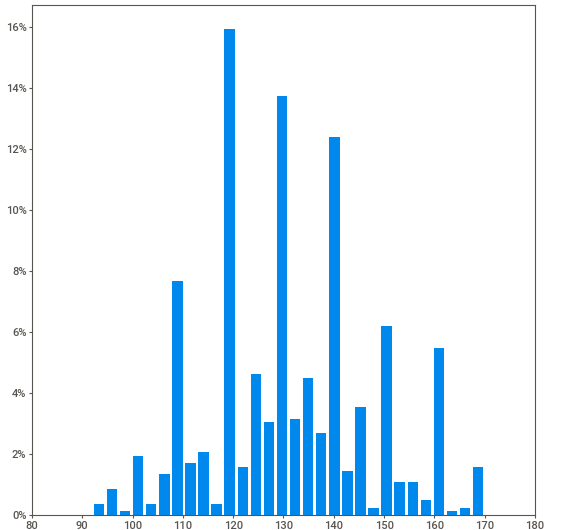
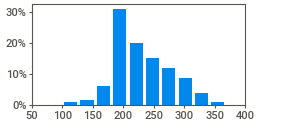
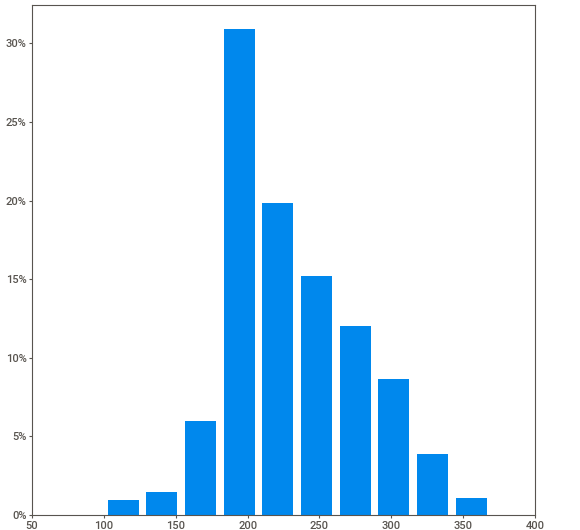
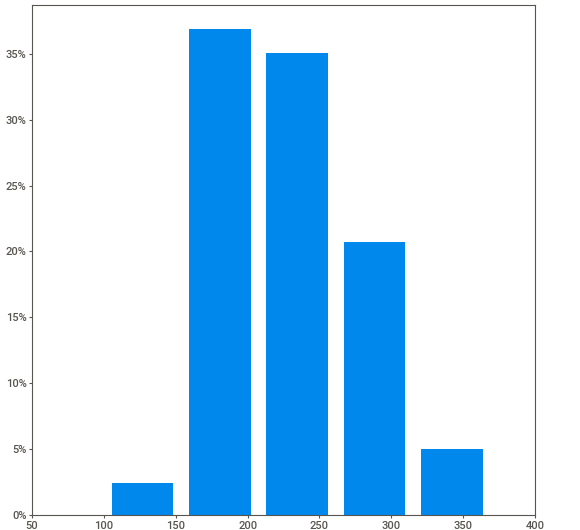
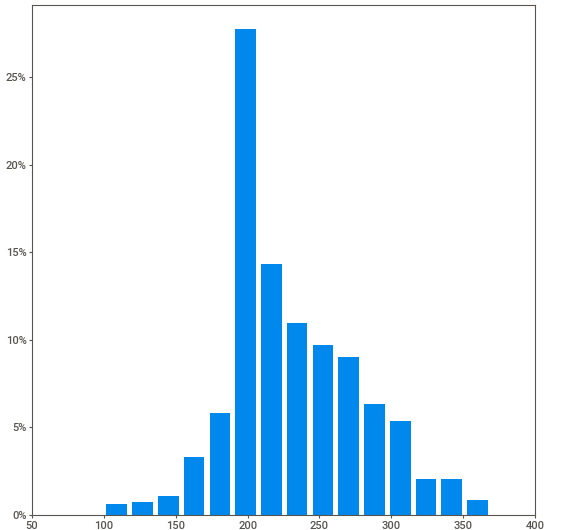
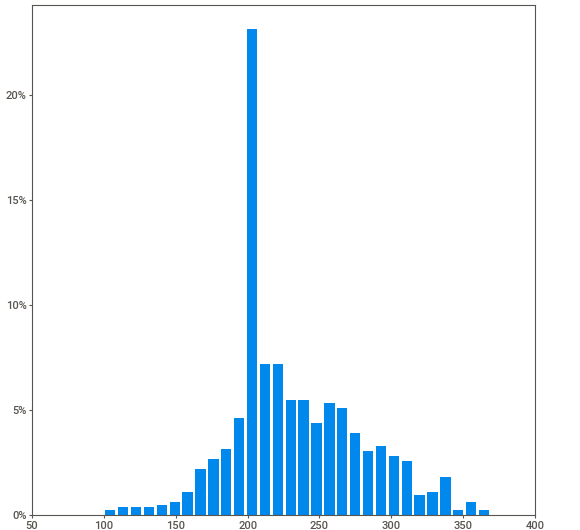
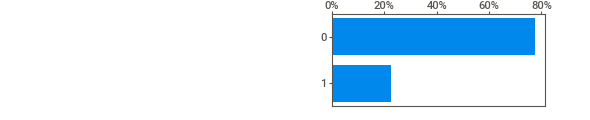
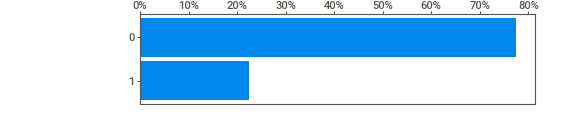
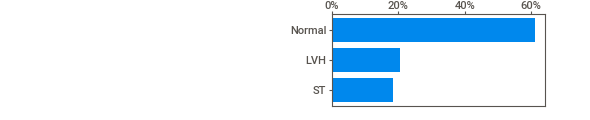
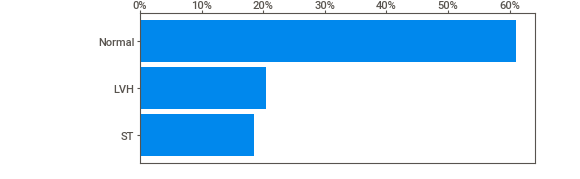
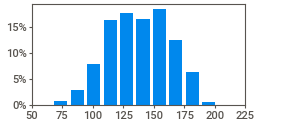
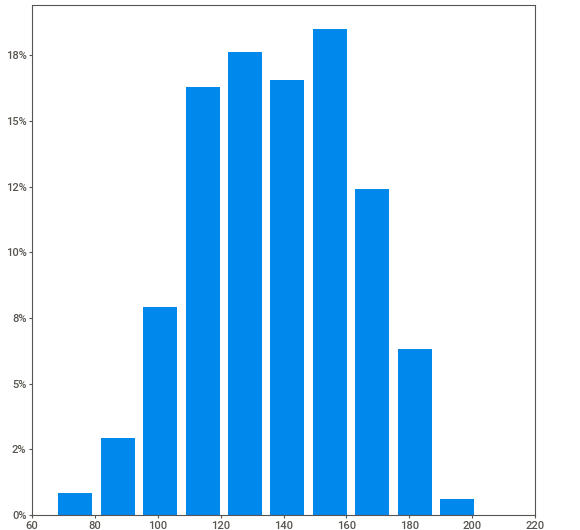
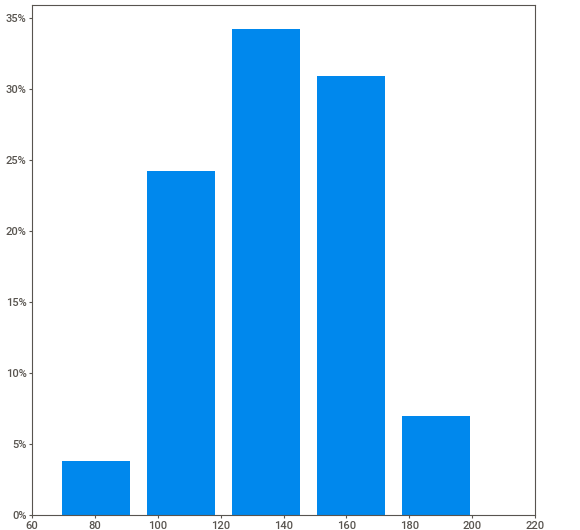
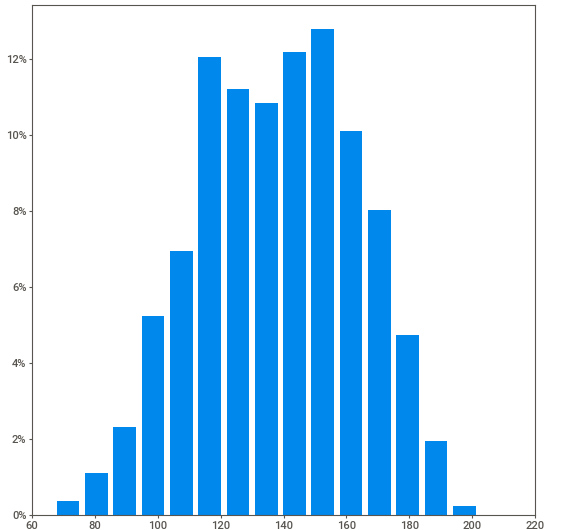
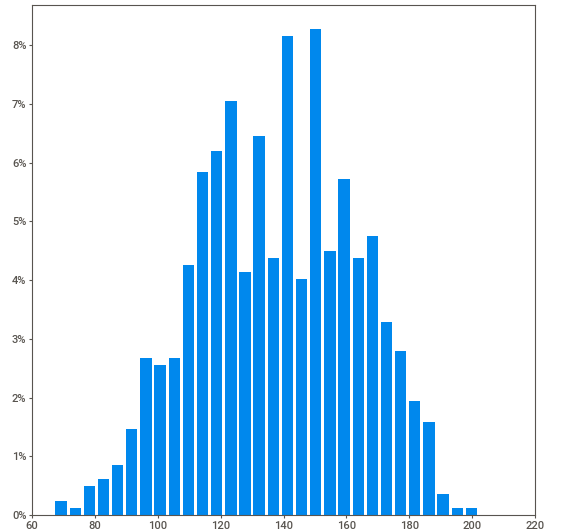
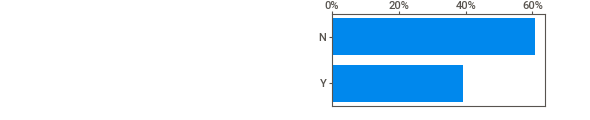
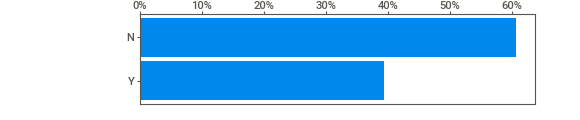
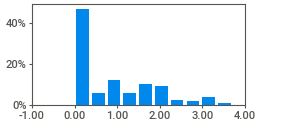
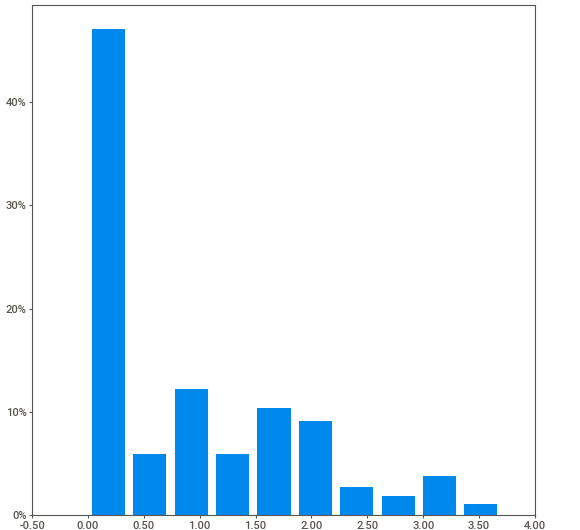
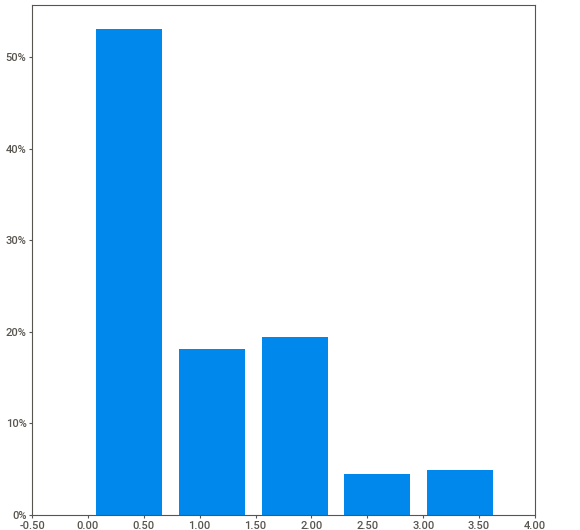
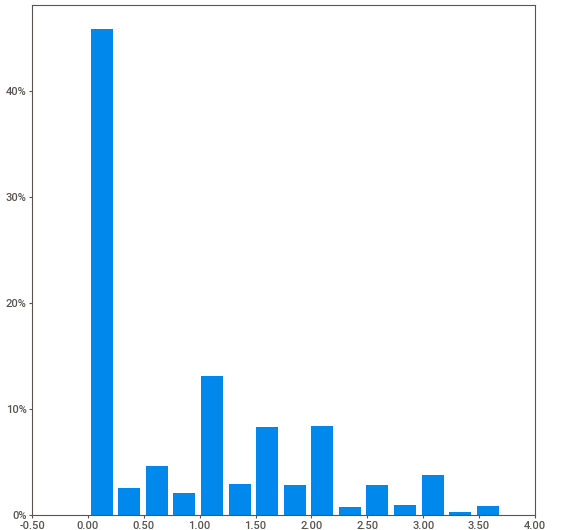
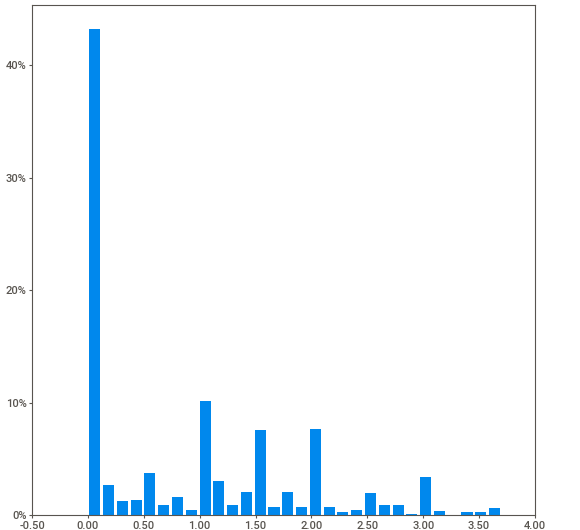
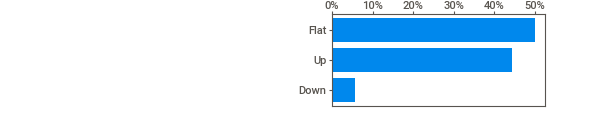
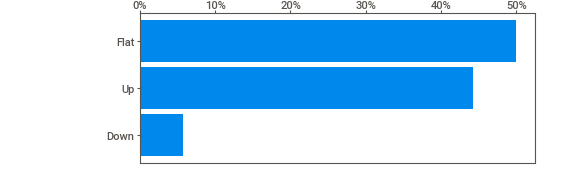
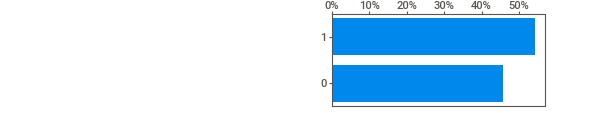
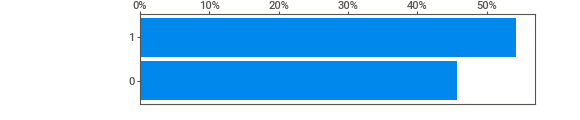
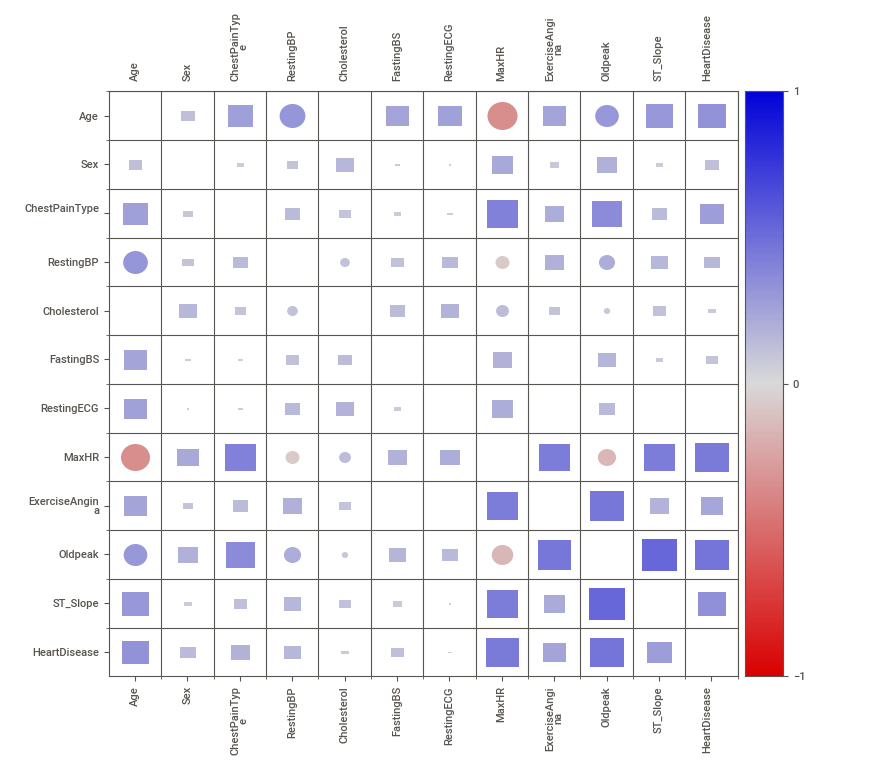
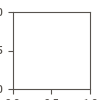

Report '..//Report-Data.html' was saved to storage.


In [ ]:
# Visual Python: Data Analysis > Sweetviz
report = sweetviz.analyze([X, 'Data-Report'])
report.show_notebook(filepath='..//Report-Data.html')
report

## Rekomendasi:
1. **Variabel Age:**
   - Lakukan pemeriksaan dan validasi terhadap pasien dengan usia di luar rentang yang normal (lebih dari 100 tahun).
   - Periksa kembali input data pasien dengan usia 0 untuk memastikan kesalahan input.

2. **Variabel Sex:**
   - Sebagai seorang data scientist, tidak mempunyai kewenangan untuk menentukan jenis kelamin. Oleh karena itu, data pasien tanpa informasi jenis kelamin dihapus.

3. **Variabel RestingBP:**
   - Sesuai standar medis, tekanan darah istirahat tidak mungkin nol. Lakukan imputasi nilai nol dengan nilai rata-rata untuk menjaga konsistensi data.

4. **Variabel Cholesterol:**
   - Seperti dengan tekanan darah istirahat, kolesterol serum tidak mungkin nol. Maka perhatikan juga pada nilai ekstrem kolesterol serum ada yang mencapai 600.

5. **Variabel Oldpeak:**
   - Hapus nilai minimum yang terdapat angka negatif, sekitar 1.5% dari populasi keseluruhan, asumsikan sebagai noise atau kesalahan input. Namun, perlu pemeriksaan lebih lanjut oleh tenaga medis terkait data tersebut.

## Transformasi

### One-Hot-Encoding

In [ ]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49.0,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
5,39.0,M,NAP,120.0,339.0,0,Normal,170,N,0.0,Up,0


### Transformasi seluruh variabel kategorik

In [ ]:
print(df.shape)
for col in catVar.columns:
    if col != 'HeartDisease':
        transformasi = pd.get_dummies(X[col], prefix='')
        X = pd.concat([X, transformasi], axis = 1)
        # Hapus Variabel Kategorik Awal, Sudah tidak diperlukan
        try:
            X.drop([col], axis=1, inplace=True)
        except Exception as err_:
            print(err_)
print(X.shape)
X.head()

(844, 12)
(822, 22)


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,_F,_M,_ASY,_ATA,...,_0,_1,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
1,49.0,160.0,180.0,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37.0,130.0,283.0,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48.0,138.0,214.0,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54.0,150.0,195.0,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
5,39.0,120.0,339.0,170,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
X.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,_F,_M,_ASY,_ATA,...,_0,_1,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
1,49.0,160.0,180.0,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37.0,130.0,283.0,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48.0,138.0,214.0,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54.0,150.0,195.0,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
5,39.0,120.0,339.0,170,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


## Menyimpan hasil penelaahan data

In [ ]:
# Saving the preprocessed Data for future use/analysis
X.to_csv("data/heart_PreProcessed.csv", encoding='utf8', index=False)

## Membangun Model

In [ ]:
# Loading Data Preprocessed
file_ = 'data/heart_PreProcessed.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/alfina33/Data/main/heart_PreProcessed.csv
    df = pd.read_csv(file_)

N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.head()

baris =  822 , Kolom (jumlah variabel) =  22


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,_F,_M,_ASY,_ATA,...,_0,_1,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
0,49.0,160.0,180.0,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
1,37.0,130.0,283.0,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
2,48.0,138.0,214.0,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,54.0,150.0,195.0,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
4,39.0,120.0,339.0,170,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           822 non-null    float64
 1   RestingBP     822 non-null    float64
 2   Cholesterol   822 non-null    float64
 3   MaxHR         822 non-null    int64  
 4   Oldpeak       822 non-null    float64
 5   HeartDisease  822 non-null    int64  
 6   _F            822 non-null    int64  
 7   _M            822 non-null    int64  
 8   _ASY          822 non-null    int64  
 9   _ATA          822 non-null    int64  
 10  _NAP          822 non-null    int64  
 11  _TA           822 non-null    int64  
 12  _0            822 non-null    int64  
 13  _1            822 non-null    int64  
 14  _LVH          822 non-null    int64  
 15  _Normal       822 non-null    int64  
 16  _ST           822 non-null    int64  
 17  _N            822 non-null    int64  
 18  _Y            822 non-null    

### Train dan Test Data

- train: buat bikin model optimal
- test: untuk kita evaluasi dari model yang optimal (semakin besar data testingnya, maka semakin besar merepresentasikan perform di dunia nyata dengan baik)

In [ ]:
predictor = df.loc[:, ~df.columns.isin(['HeartDisease'])]
target = df['HeartDisease']

xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.3, random_state=33)
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(575, 21) (575,)
(247, 21) (247,)


- Data dibagi menjadi set pelatihan dan pengujian dengan perbandingan 70% data untuk pelatihan dan 30% untuk pengujian.
- Hasilnya, set pelatihan (xTrain dan yTrain) memiliki 575 sampel, sedangkan set pengujian (xTest dan yTest) memiliki 247 sampel.

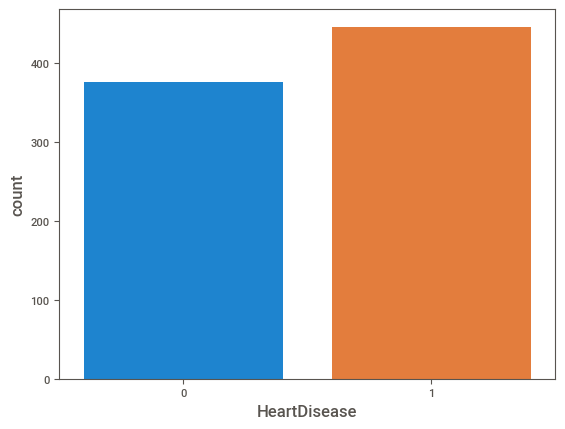

Counter({1: 446, 0: 376})
0 = 54.257907542579076 %  1 = 45.742092457420924 %


In [ ]:
# Visual Python: Visualization > Seaborn
from collections import Counter

sns.countplot(data=df, x='HeartDisease')
plt.show()

D = Counter(df['HeartDisease'])
print(D)
print("1 =", D[1]*100/(len(df['HeartDisease'])), '%  0 =',D[0]*100/(len(df['HeartDisease'])) ,'%')

- Counter:
  Kelas "1" (penyakit jantung) terdapat 446 pasien.
  Kelas "0" (normal) terdapat 376 pasien.
- Dataset tidak memiliki distribusi kelas yang sangat tidak seimbang karena persentase kedua kelas tidak memiliki perbedaan yang signifikan.
- Kelas mayoritas adalah kelas "1" (penyakit jantung) dengan persentase sekitar 54.26%, sedangkan kelas "0" (normal) memiliki persentase sekitar 45.74%.

## Model Regresi Logistik

In [ ]:
reglog = LogisticRegression().fit(xTrain, yTrain)
prediksi_regLog = reglog.predict(xTest)
print(confusion_matrix(yTest, prediksi_regLog))
print(classification_report(yTest, prediksi_regLog))

[[101  20]
 [ 12 114]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       121
           1       0.85      0.90      0.88       126

    accuracy                           0.87       247
   macro avg       0.87      0.87      0.87       247
weighted avg       0.87      0.87      0.87       247



- Pasien yang normal dan diprediksi normal oleh model test data ada 101 pasien
- Pasien yang normal dan diprediksi memiliki penyakit jantung oleh model test data ada 20 pasien
- Pasien dengan penyakit jantung dan diprediksi normal oleh model test data ada 12 pasien
- Pasien dengan penyakit jantung dan diprediksi penyakit jantung oleh model test data ada 114 pasien

- Precision:
Precision untuk kelas "0" (normal) adalah 0.89. Dari semua prediksi yang diklasifikasikan sebagai tidak ada penyakit jantung, 89% di antaranya benar.
Precision untuk kelas "1" (penyakit jantung) adalah 0.85. Dari semua prediksi yang diklasifikasikan sebagai ada penyakit jantung, 85% di antaranya benar.

- Recall (Sensitivity):
Recall untuk kelas "0" adalah 0.83. Dari semua instance yang sebenarnya tidak memiliki penyakit jantung, model dapat mengidentifikasikan 83% dengan benar.
Recall untuk kelas "1" adalah 0.90. Dari semua instance yang sebenarnya memiliki penyakit jantung, model dapat mengidentifikasikan 90% dengan benar.

- F1-Score:
F1-score menggabungkan precision dan recall. Untuk kelas "0", F1-score adalah 0.86, dan untuk kelas "1" adalah 0.88.

- Accuracy:
Akurasi model adalah 0.87, yang menunjukkan sejauh mana model dapat mengklasifikasikan instance dengan benar secara keseluruhan.

- Macro Avg dan Weighted Avg:
  - Macro avg adalah rata-rata dari metrik-metrik (precision, recall, f1-score) untuk setiap kelas tanpa memperhitungkan frekuensi kelas.
  - Weighted avg adalah rata-rata yang memberi bobot lebih besar pada kelas dengan frekuensi yang lebih tinggi.

Secara keseluruhan, model regresi logistik memiliki performa yang baik dengan nilai precision, recall, dan f1-score yang tinggi untuk kedua kelas. Akurasi model juga tinggi (87%), menunjukkan bahwa model ini dapat secara efektif mengklasifikasikan data pada dataset pengujian.

In [ ]:
coefficients = reglog.coef_[0]

# dataframe untuk visualisasi
feature_importance_df = pd.DataFrame({'Features': xTrain.columns, 'Importance': coefficients})

# Urutkan DataFrame berdasarkan nilai koefisien (importance)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Features,Importance
7,_ASY,1.130681
19,_Flat,1.092838
6,_M,0.708635
12,_1,0.590818
17,_Y,0.454447
4,Oldpeak,0.321595
15,_ST,0.146825
13,_LVH,0.134158
18,_Down,0.035509
0,Age,0.024938


**Interpretasi Koefisien**:

Positif (Positive Coefficient):

Fitur dengan koefisien positif memiliki dampak positif pada peluang prediksi kelas "1" (ada penyakit jantung).
Contoh: Fitur "_ASY" (Asymptomatic) dan "_Flat" (Flat) memiliki dampak positif yang signifikan.

Negatif (Negative Coefficient):

Fitur dengan koefisien negatif memiliki dampak negatif pada peluang prediksi kelas "1" (ada penyakit jantung).
Contoh: Fitur "_Up" (Upsloping) memiliki dampak negatif yang signifikan.

Magnitude (Magnitude of Coefficient):

Besar kecilnya nilai koefisien menunjukkan seberapa besar dampak suatu fitur terhadap prediksi.
Semakin besar nilai koefisien (positif atau negatif), semakin besar pengaruhnya terhadap prediksi.

Fitur Paling Penting:

Fitur "_ASY" (Asymptomatic) memiliki koefisien paling tinggi, menunjukkan bahwa kehadiran gejala "Asymptomatic" memiliki dampak paling positif terhadap prediksi penyakit jantung.
Fitur "_Up" (Upsloping) memiliki koefisien paling rendah, menunjukkan bahwa kemiringan "Upsloping" memiliki dampak paling negatif terhadap prediksi penyakit jantung.
V

Text(62.222222222222214, 0.5, 'Truth')

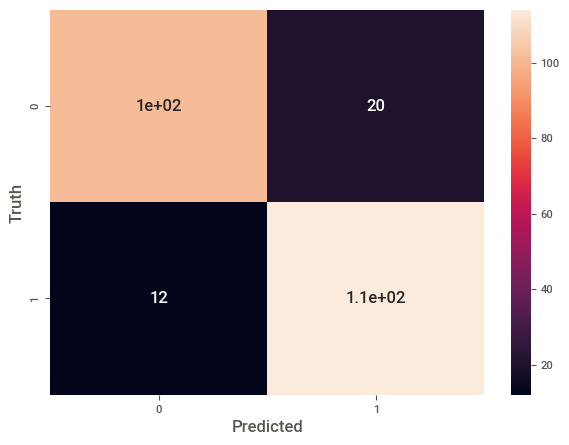

In [ ]:
# visualisasi confusion matrix
cm = confusion_matrix(yTest, prediksi_regLog)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Cross Validation

In [ ]:
mulai = time.time()
scores_regLog = cross_val_score(reglog, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.84 (+/- 0.13), Waktu = 0.807 detik


Pada model regresi logistik, akurasi sebelum melakukan cross validasi sebesar 87% kemudian setelah melakukan cross validasi menurun 3% menjadi 84%. Hal tersebut mungkin saja terjadi karena overfitting pada data latih sehingga memberikan evaluasi yang lebih konsisten.

## Decision Tree

In [ ]:
DT = tree.DecisionTreeClassifier()
DT = DT.fit(xTrain, yTrain)
prediksi_DT = DT.predict(xTest)

print(confusion_matrix(yTest, prediksi_DT))
print(classification_report(yTest, prediksi_DT))

[[ 96  25]
 [ 22 104]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       121
           1       0.81      0.83      0.82       126

    accuracy                           0.81       247
   macro avg       0.81      0.81      0.81       247
weighted avg       0.81      0.81      0.81       247



- Pasien yang normal dan diprediksi normal oleh model test data ada 96 pasien
- Pasien yang normal dan diprediksi memiliki penyakit jantung oleh model test data ada 25 pasien
- Pasien dengan penyakit jantung dan diprediksi normal oleh model test data ada 22 pasien
- Pasien dengan penyakit jantung dan diprediksi penyakit jantung oleh model test data ada 104 pasien

**Interpretasi:**
- Model Decision Tree memiliki tingkat akurasi sekitar 81%, yang berarti model ini dapat memprediksi dengan benar sekitar 81% dari total kasus pada dataset pengujian.
- Precision dan recall untuk kedua kelas (0 dan 1) cukup seimbang.
- Meskipun model memiliki performa yang cukup baik, evaluasi lebih lanjut dan perbandingan dengan model lain (jika ada) dapat memberikan pemahaman yang lebih baik tentang performa relatif dan kecocokan model untuk kebutuhan bisnis atau ilmiah tertentu.

Text(62.222222222222214, 0.5, 'Truth')

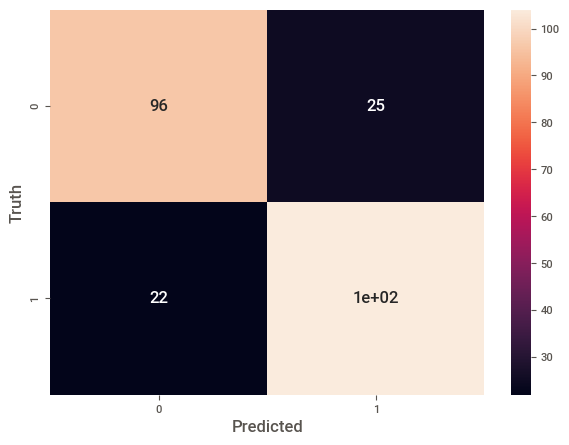

In [ ]:
# visualisasi confusion matrix
cm = confusion_matrix(yTest, prediksi_DT)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
def DT_feature_importance(x_train,y_train):
  importances = DT.feature_importances_

  final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
  final_df.set_index('Importances')

  final_df = final_df.sort_values('Importances',ascending=False)

  pd.Series(DT.feature_importances_, index=x_train.columns).nlargest(10).plot(kind='barh', title='Decison Tree Feature Importance')
  return final_df

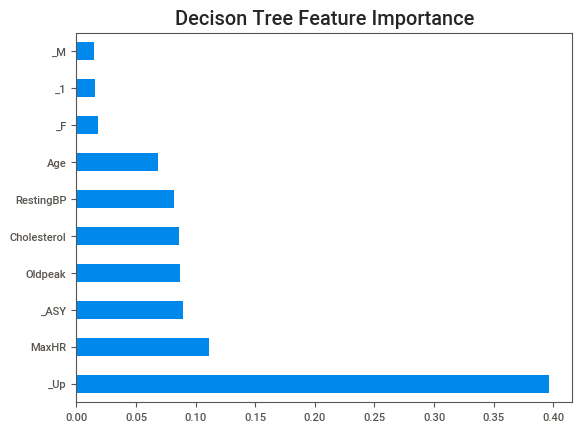

In [ ]:
feature_importance = DT_feature_importance(xTrain, yTrain)

fitur important yang paling mempengaruhi dalam prediksi heart disease

### Cross Validation

In [ ]:
mulai = time.time()
scores_dt = cross_val_score(DT, predictor, target, cv=10)
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.78 (+/- 0.10), Waktu = 0.084 detik


Cross-validation digunakan untuk memperoleh estimasi performa model yang lebih stabil dan mengurangi risiko overfitting atau underfitting.

## Membandingkan Model

RegLog     0.695122
DecTree    0.707317
dtype: float64

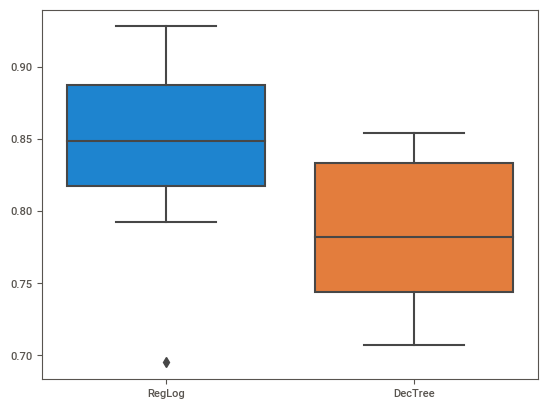

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog, "DecTree":scores_dt})
p = sns.boxplot(data = df_)
df_.min()

**Interpretasi:**

- Distribusi skor akurasi Regresi Logistik (RegLog) cenderung dimulai dari sekitar 0.70 (70%) hingga nilai tertinggi yang mungkin.
- Distribusi skor akurasi Decision Tree (DecTree) cenderung dimulai dari sekitar 0.71 (71%) hingga nilai tertinggi yang mungkin.
Meskipun nilai minimum untuk Regresi Logistik (0.70) lebih rendah dibandingkan dengan nilai minimum Decision Tree (0.71), distribusi dan variabilitas skor akurasi keduanya terlihat serupa.

## Hyperparameter Optimization (Mengevaluasi Hasil Pemodelan)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn import linear_model #import LogisticRegression

pipeSVM = make_pipeline(linear_model.LogisticRegression())
print(sorted(pipeSVM.get_params().keys()))

['logisticregression', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start', 'memory', 'steps', 'verbose']


In [ ]:
# Hyperparameter optimization pada model Regresi Logistik menggunakan gridCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'class_weight':[None, 'balanced']}]

grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_search.fit(xTrain, yTrain)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
0.8608695652173914
{'C': 0.1}


**Interpretasi:**

- Proses GridSearchCV membantu mencari kombinasi hyperparameter terbaik untuk meningkatkan kinerja model.
- Akurasi sekitar 86.08% mencerminkan kinerja model Regresi Logistik setelah tuning hyperparameter.
- Hyperparameter terbaik adalah 'C': 0.1, yang menunjukkan kekuatan regulasi yang optimal untuk model tersebut.

In [ ]:
pipeDT = make_pipeline(tree.DecisionTreeClassifier())
print(sorted(pipeDT.get_params().keys()))

['decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter', 'memory', 'steps', 'verbose']


In [ ]:
# Optimal parameter Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree_model=DecisionTreeClassifier()
dtree_gscv = RandomizedSearchCV(dtree_model, param_grid, cv=10)
dtree_gscv.fit(xTrain, yTrain)

print(dtree_gscv.best_score_)
print(dtree_gscv.best_params_)

0.8364791288566241
{'max_depth': 4, 'criterion': 'gini'}


**Interpretasi:**

- Proses RandomizedSearchCV membantu mencari kombinasi hyperparameter terbaik untuk meningkatkan kinerja model Decision Tree.
- Akurasi sekitar 83.65% mencerminkan kinerja model setelah tuning hyperparameter.
- Hyperparameter terbaik yang ditemukan adalah 'max_depth': 4 dan 'criterion': 'gini', menunjukkan bahwa kedalaman maksimum pohon adalah 4 dan kriteria gini dianggap lebih baik.

## Model Selection

Accuracy RL: 0.84 (+/- 0.12)
Accuracy DT: 0.81 (+/- 0.16)


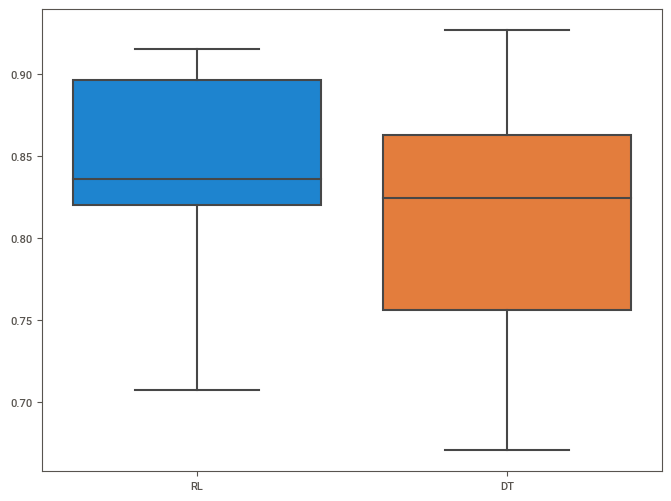

In [ ]:
kCV = 10
# Menggunakan parameter optimal
RL_opt = LogisticRegression(C=0.1)
DT_opt = tree.DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

# Melakukan Cross Validasi
models = ['RL', 'DT']
RL_score = cross_val_score(RL_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
DT_score = cross_val_score(DT_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
scores = [RL_score, DT_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
p = sns.boxplot(data=pd.DataFrame(data), ax=ax)

**Hasil Cross Validation:**

Akurasi model Regresi Logistik (RL) adalah sekitar 84% dengan deviasi standar sekitar 12%.
Akurasi model Decision Tree (DT) adalah sekitar 81% dengan deviasi standar sekitar 16%.

**Interpretasi:**

- Hasil menunjukkan bahwa model Regresi Logistik (RL) memiliki akurasi yang sedikit lebih tinggi dibandingkan dengan model Decision Tree (DT) berdasarkan rata-rata cross-validation.
- Deviasi standar (variasi) akurasi yang relatif kecil menunjukkan bahwa model RL dan DT konsisten dalam performa mereka di setiap lipatan cross-validation.

# **Rekomendasi**

1. Model:

  Model Regresi Logistik memiliki akurasi sekitar 84%, sedangkan Decision Tree sekitar 81%. Oleh karena itu, model Regresi Logistik dapat dijadikan pilihan utama.

2. Fitur Important:
  
  Variabel seperti jenis nyeri dada, kemiringan ST selama latihan, jenis kelamin, dan adanya angina selama latihan memiliki pengaruh signifikan dalam memprediksi penyakit jantung. Dokter dapat memperhatikan karakteristik ini saat melakukan evaluasi pasien.

3. Optimasi Model:
  
  Model Regresi Logistik telah dioptimalkan menggunakan GridSearchCV, dan model Decision Tree menggunakan RandomizedSearchCV. Dengan pengoptimalan ini, kinerja model dapat ditingkatkan.

4. Implementasi dan Evaluasi Lebih Lanjut:
  
  Model dapat diimplementasikan dalam lingkungan klinis dan dievaluasi lebih lanjut dengan melibatkan tim medis. Penilaian lebih lanjut dapat melibatkan feedback dari praktisi medis untuk meningkatkan kehandalan dan kegunaan model.

5. Edukasi dan Kesadaran:
   
  Meningkatkan edukasi dan kesadaran tentang faktor risiko penyakit jantung dapat membantu masyarakat lebih proaktif dalam menjaga kesehatan mereka. Informasi ini dapat digunakan untuk memberikan saran preventif kepada individu dengan risiko tinggi.